In [32]:
import numpy as np
import matplotlib.pyplot as plt

#### Exercise 1

In [33]:
def y(R, T):
    return R(T) / T

def D(R, T, t=0):
    return np.exp(-(R(T) - R(t)))

In [34]:
def r(t):
    return 0.028 + 0.00042 * t

def R(t):
    return 0.028 * t + 0.00042 * t**2 / 2

(a)

In [35]:
y(R, 20)

0.0322

(b)

In [36]:
1000 * D(R, 15)

626.7233899781444

#### Exercise 2

In [37]:
def r(t):
    return 0.04 + 0.0002 * t - 0.00003 * t**2

def R(t):
    return 0.04 * t + 0.0002 * t**2 / 2 - 0.00003 * t**3 / 3

(a)

In [38]:
y(R, 8)

0.04016

(b)

In [39]:
1000 * D(R, 5)

817.7079790036046

(c)

In [40]:
ts = np.linspace(0.01, 30, 300)

Text(0.5, 1.0, 'yield curve')

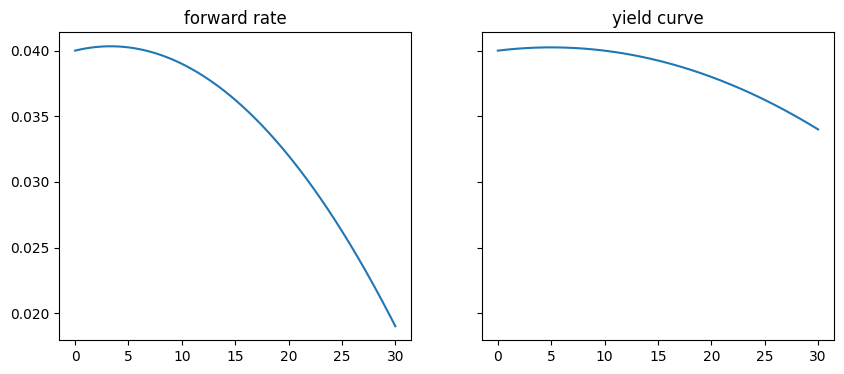

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True)
axs[0].plot(ts, r(ts))
axs[0].set_title('forward rate')
axs[1].plot(ts, y(R, ts))
axs[1].set_title('yield curve')

Both curves are concave, but the forward rates are dropping steeper for higher maturities than do yields.

(d)

In [42]:
D(R, 10, 1) / D(R, 10, 0) - 1

0.04090445137747545

In [43]:
np.exp((R(1) - R(0))) - 1

0.04090445137747567

#### Exercise 3

(a) The coupon rate is $C/par$, whereas the current yield is $C/P$, where $P$ is the current price, hence if the current yield is below the coupon rate, it means that the price is above par.

(b) The yield to maturity is below 2.8%, because 2.8% would be the yield to maturity if par was equal to price, but par is below the current price, so the yield to maturity must be lower still.

#### Exercise 4

In [44]:
def r(t):
    return 0.032 + 0.0001 * t + 0.00002 * t**2

def R(t):
    return 0.032 * t + 0.0001 * t**2 / 2 + 0.00002 * t**3 / 3

(a)

In [45]:
y(R, 5)

0.03241666666666666

(b)

In [47]:
1000 * D(R, 5)

850.3703373926935

#### Exercise 5

In [54]:
rates = np.array([0.025, 0.028, 0.032, 0.033])

In [55]:
cash_flows = np.array([35, 35, 35, 1035])

In [56]:
np.sum(cash_flows / (1 + rates) ** np.arange(1, 5))

1008.0578433168787

#### Exercise 7

In [58]:
def bond_value(c: float, T: float, r: float, par: float):
    """Computes bv = bond values (current prices) corresponding
    to all values of yield to maturity in the input vector r
    
    Parameters
    ==========
    c: float
        coupon payment (semiannual)
    T: float
        time to maturity (in years)
    r: float
        vector of yields to maturity (semiannual rates)
    par: float
        par value
    """
    return c / r + (par - c / r) * (1 + r)**(-2 * T)

(a) The coupon remains $\frac12 \cdot 8.5\% = 4.25\%$, which is $42.5 semiannually.

(b)

In [60]:
bond_value(42.5, 19, 0.076 / 2, 1000)

1089.7179077140117

(c)

In [61]:
bond_value(42.5, 19, 0.076 / 2, 1000) + 42.5

1132.2179077140117

#### Exercise 8

(a)

In [63]:
-np.log(828 / 1000) / 5

0.03774842491937548

(b)

In [65]:
p1y = 1000 * np.exp(-4 * 0.042)
p1y

845.3538346846588

(c)

In [67]:
p0 = 828

In [68]:
(p1y - p0) / p0

0.020958737541858393

#### Exercise 9

(a)

In [70]:
bond_value(21, 10, 0.04 / 2, 1000)

1016.3514333445971

(b) The bond is selling above par, because the coupon rate is higher than the yield to maturity.

#### Exercise 10

(a)

In [71]:
from scipy.optimize import brentq

In [72]:
r = brentq(lambda r: bond_value(23, 7, r, 1000) - 1040, 0.001, 1.0)
r

0.01970282758714493

(b)

In [73]:
23 / 1040 * 2

0.04423076923076923

(c) The yield to maturity is lower than the current yield since the bond is selling above par.

#### Exercise 11

In [75]:
def r(t):
    return 0.033 + 0.0012 * t

def R(t):
    return 0.033 * t + 0.0012 * t**2 / 2

In [76]:
1000 * D(R, 15)

532.5918010068972

#### Exercise 12

In [82]:
R1 = lambda t: 0.04 * t + 0.001 * t**2 / 2
R2 = lambda t: 0.03 * t + 0.0013 * t**2 / 2

In [83]:
(D(R2, 7.5) - D(R1, 8)) / D(R1, 8)

0.09465308968550235

#### Exercise 13

In [85]:
0.001 - 0.00021

0.00079

In [87]:
# if t < 10
R1 = lambda t: 0.03 * t + 0.001 * t**2 / 2
# if t >= 10
R2 = lambda t: 0.0321 * t + 0.00079 * t**2 / 2

In [88]:
1/20 * (R2(20) - R2(10) + R1(10) - R(1))

0.037942500000000004

#### Exercise 14

In [99]:
spot_rates = np.array([0, 0.031, 0.035, 0.04, 0.042, 0.043])

In [100]:
maturities = np.array([1, 3, 5])

(a)

In [104]:
p0 = 1000 / (1 + spot_rates[maturities]) ** (2 * maturities)
p0

array([940.76828783, 790.31452573, 656.38238218])

(b)

In [107]:
p1u = 1000 / (1 + spot_rates[maturities - 1]) ** (2 * (maturities - 1))
p1u

array([1000.        ,  871.4422277 ,  719.54547816])

(c)

In [108]:
p1c = 1000 / (1 + (spot_rates + 0.005)[maturities - 1]) ** (2 * (maturities - 1))
p1c

array([1000.        ,  854.80419103,  692.51079326])

(d)

In [109]:
(p1c - p0) / p0

array([0.062961  , 0.0816    , 0.05504171])

Therefore, the 3-year bond produces the highest return.

(e)

In [110]:
(p1u - p0) / p0

array([0.062961  , 0.10265242, 0.09622912])

The 3-year bond produces the highest return in this scenario as well.

(f) The highest spot rate corresponds to 5-year maturity, but it is the 3-year bond the produces the highest return, so the analyst is not correct.

#### Exercise 16

(a)

In [112]:
yT = lambda t: 0.04 + 0.001 * t

In [116]:
p0 = 1000 / np.exp(10 * yT(10))
p0

606.5306597126335

(b)

In [115]:
yT1y = lambda t: 0.042 + 0.001 * t

In [118]:
p1 = 1000 / np.exp(9 * yT1y(9))
p1

631.9152448994959

In [119]:
(p1 - p0) / p0

0.04185210554547944

#### Exercise 20

In [122]:
maturities = np.array([0.5, 1.0, 1.5, 2.0])
prices = np.array([980.39, 957.41, 923.18, 888.489])

(a)

In [131]:
r = (1000 / prices) ** (1 / 2 / maturities) - 1
r

array([0.02000224, 0.02200029, 0.0270018 , 0.02999943])

(b)

In [128]:
cash_flows = np.array([21, 21, 21, 1021])

In [134]:
Df = prices / 1000

In [135]:
np.sum(cash_flows * Df)

967.2278490000001

Or alternatively,

In [133]:
np.sum(cash_flows / (1 + r) ** np.arange(1, 5))

967.2278490000004

#### Exercise 21

In [136]:
r = brentq(lambda r: bond_value(25, 4, r, 1000) - 1015, 0.001, 1.0)
r

0.022926445293188318

#### Exercise 22

In [137]:
R = lambda t: 0.022 * t + 0.005 * t**2 / 2 - 0.004 * t**3 / 3 + 0.0003 * t**4 / 4

In [140]:
ts = np.arange(1, 9) / 2

In [145]:
cash_flows = np.array([21] * 8) + np.array([0] * 7 + [1000])

In [148]:
np.sum(cash_flows * np.exp(-R(ts)))

1100.869661451915